<a href="https://colab.research.google.com/github/annikahurd/notebook5/blob/main/HURD_Notebook5_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS167/Datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


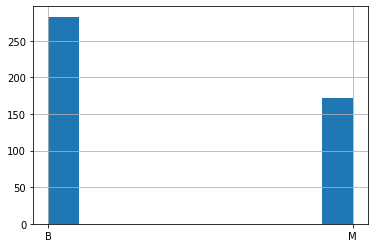

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default SVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print()

print("Accuracy:", accuracy_score(test_sln, predictions))

vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))



Accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


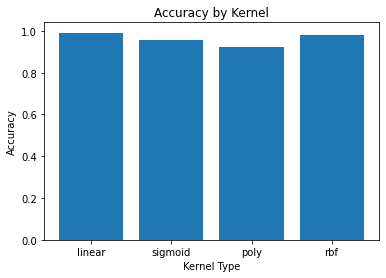

[0.9912280701754386, 0.956140350877193, 0.9210526315789473, 0.9824561403508771]


In [ ]:
#Tuned SVC:
tune_features = ['linear', 'sigmoid', 'poly', 'rbf']
tune_acc = []

for i in tune_features:
  clf_tune = SVC(kernel = i)
  clf_tune.fit(train_data,train_sln)
  predictions_tune = clf_tune.predict(test_data)
  acc_tune = accuracy_score(test_sln, predictions_tune)
  tune_acc.append(acc_tune)

import matplotlib.pyplot as plt

x_axis = tune_features
y_axis = tune_acc

plt.bar(x_axis, y_axis)
plt.title('Accuracy by Kernel')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

print(tune_acc)

2. Perceptron: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default Perceptron
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

print("Accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))


Accuracy: 0.9824561403508771


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_grad

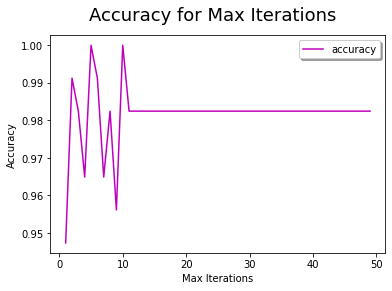

In [ ]:
#Tuned Perceptron
tuned_perc_acc = []
for i in range (1, 50):
  perc_tune = Perceptron(max_iter = i)
  perc_tune.fit(train_data, train_sln)
  tune_perc_preds= perc_tune.predict(test_data)
  acc = metrics.accuracy_score(test_sln, tune_perc_preds)
  tuned_perc_acc.append(acc)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 50)
plt.suptitle('Accuracy for Max Iterations', fontsize=18)
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.plot(xvals, tuned_perc_acc, 'm-', label='accuracy')
plt.legend(loc='upper right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

print("Accuracy:", metrics.accuracy_score(test_sln, sgd_predictions))




Accuracy: 0.9736842105263158


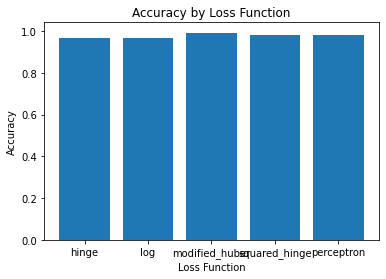

0.9649122807017544


In [ ]:
#Tuned SGD
tune_features_sgd = tune_features = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
tune_acc_sgd = []

for i in tune_features_sgd:
  tune_sgd = SGDClassifier(loss = i)
  tune_sgd.fit(train_data,train_sln)
  predictions_tune_sgd = tune_sgd.predict(test_data)
  acc_sgd_tune = accuracy_score(test_sln, predictions_tune_sgd)
  tune_acc_sgd.append(acc_sgd_tune)

import matplotlib.pyplot as plt

x_axis = tune_features_sgd
y_axis = tune_acc_sgd

plt.bar(x_axis, y_axis)
plt.title('Accuracy by Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')
plt.show()


squl = SGDClassifier(loss = 'hinge')
squl.fit(train_data,train_sln)
predictions_squl = squl.predict(test_data)
acc_squl = accuracy_score(test_sln, predictions_squl)
print(acc_squl)

3. Now take the model that performed the best above and run a **principal component analysis** on it. 

0.9912280701754386


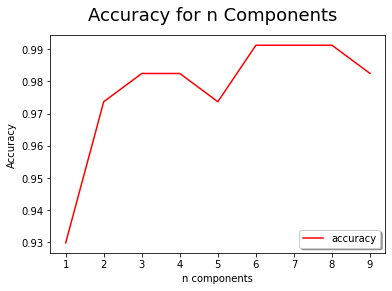

In [ ]:
#PCA on best model
#The model that performed with equally high accuracy were the tuned SGD and the tuned SVM
#I am choosing to use the SVM since I am least familiar with that code and I would like more exposure. 
from sklearn.decomposition import PCA

extractor_cancer = PCA(n_components=6, whiten=True)
extractor_cancer.fit(train_data)
test_transformed_cancer = extractor_cancer.transform(test_data)
train_transformed_cancer = extractor_cancer.transform(train_data)

linear = SVC(kernel = 'linear')
linear.fit(train_transformed_cancer, train_sln)
predictions_linear = linear.predict(test_transformed_cancer)

linear_PCA_acc = accuracy_score(test_sln, predictions_linear)

print(linear_PCA_acc)


linear_acc = []
for i in range (1, 10):
  extractor_cancer = PCA(n_components=i, whiten=True)
  extractor_cancer.fit(train_data)
  test_transformed_cancer = extractor_cancer.transform(test_data)
  train_transformed_cancer = extractor_cancer.transform(train_data)

  linear = SVC(kernel = 'linear')
  linear.fit(train_transformed_cancer, train_sln)
  predictions_linear = linear.predict(test_transformed_cancer)
  acc_linear = accuracy_score(test_sln, predictions_linear)
  linear_acc.append(acc_linear)

import matplotlib.pyplot as plt
%matplotlib inline  

xvals = range(1, 10)
plt.suptitle('Accuracy for n Components', fontsize=18)
plt.xlabel('n components')
plt.ylabel('Accuracy')
plt.plot(xvals, linear_acc, 'r-', label='accuracy')
plt.legend(loc='lower right', shadow=True)
#plt.axis([1, number_of_points, 10,35])
plt.show()

## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
\
The models that performed the best (recieving the same accuracy score), were the SVM with a linear Kernel, the SGD with a tuned loss function. There was a little bit of randomness with the SGD and its best parameter, but the SVM was consistently above 99% accuracy. I think that a reason that none of these models were ever 100% accurate is due to the possibility of noise in the data. It is possible that some people tested for breast cancer had very similar features except for the target. I think that SVM did especially well since it only focused on the support vectors so the model was able to make predictions based on data that was more closely clustered. It is my guess that the perceptron was the least accurate since there are many different $x_{i}$, so it was likely very difficult to find the optimal weights. 
\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?
\
PCA did not really affect the best model, which in this case was SVM. I think that a reason for this is that the SVM model was already so accurate that the PCA did not greatly affect this.